## Compare the confidence of the output of the three models and plot them
hyena_file
ntv2_file
cdgpt_file
They stored the prediction results for the expression of the M12178 cell line on their respective models, so they needed to combine the contents of the three files into one file for easy processing and mapping
The result is merged into the step/merge_model_valid_data_result.pt file

In [1]:
hy_c10_train_analysis_path = "../02-train&valid/hyena/result/hyena_c10_690_train.pt"
hy_c10_valid_analysis_path = "../02-train&valid/hyena/result/hyena_c10_690_valid.pt"
hy_c10_test_analysis_path = "../02-train&valid/hyena/result/hyena_c10_690_test.pt"
nt_c10_train_analysis_path = "../02-train&valid/ntv2/result/ntv2_c10_train_results.pt"
nt_c10_valid_analysis_path = "../02-train&valid/ntv2/result/ntv2_c10_valid_results.pt"
nt_c10_test_analysis_path = "../02-train&valid/ntv2/result/ntv2_c10_test_results.pt"
cd_c10_train_analysis_path = "../02-train&valid/cdgpt/result/cdgpt_c10_2_3036_train_results.pt"
cd_c10_valid_analysis_path = "../02-train&valid/cdgpt/result/cdgpt_c10_2_3036_valid_results.pt"
cd_c10_test_analysis_path = "../02-train&valid/cdgpt/result/cdgpt_c10_2_3036_test_results.pt"

hy_train_file_path = "../01-data/C10_hyena_20kbp_train_dataset.pt"
hy_valid_file_path = "../01-data/C10_hyena_20kbp_valid_dataset.pt"
hy_test_file_path = "../01-data/C10_hyena_20kbp_test_dataset.pt"

nt_train_file_path = "../01-data/C10_ntv2_12kbp_train_dataset.pt"
nt_valid_file_path = "../01-data/C10_ntv2_12kbp_valid_dataset.pt"
nt_test_file_path = "../01-data/C10_ntv2_12kbp_test_dataset.pt"

## Integrate the output data of all models

In [ ]:
import torch
import os

def load_model_results(file_path):
    data = torch.load(file_path)
    return data['label'], data['prediction'], data['loss'], data['confidence']

if __name__ == "__main__":
    test_file = hy_valid_file_path
    hyena_file = hy_c10_valid_analysis_path
    ntv2_file = nt_c10_valid_analysis_path
    cdgpt_file = cd_c10_valid_analysis_path
    
    test_data = torch.load(test_file)
    sequences = test_data['sequences']
    test_labels = torch.tensor(test_data['labels']) 
    
    hy_labels, hy_predictions, hy_losses, hy_confidences = load_model_results(hyena_file)
    nt_labels, nt_predictions, nt_losses, nt_confidences = load_model_results(ntv2_file)
    cd_labels, cd_predictions, cd_losses, cd_confidences = load_model_results(cdgpt_file)
    
    hy_labels = torch.tensor(hy_labels)
    nt_labels = torch.tensor(nt_labels)
    cd_labels = torch.tensor(cd_labels)
    
    if not (torch.equal(test_labels, hy_labels) and 
            torch.equal(test_labels, nt_labels) and 
            torch.equal(test_labels, cd_labels)):
        raise ValueError("labels are inconsistent")
    
    merged_results = {
        'sequence': sequences,
        'label': test_labels.tolist(),
        'hy_label': hy_labels.tolist(),
        'hy_prediction': hy_predictions,
        'hy_loss': hy_losses,
        'hy_confidence': hy_confidences,
        'nt_label': nt_labels.tolist(),
        'nt_prediction': nt_predictions,
        'nt_loss': nt_losses,
        'nt_confidence': nt_confidences,
        'cd_label': cd_labels.tolist(),
        'cd_prediction': cd_predictions,
        'cd_loss': cd_losses,
        'cd_confidence': cd_confidences
    }
    output_path = "merged-file/merged_model_valid_data.pt"
    torch.save(merged_results, output_path)
    print(f"Data saved successfully to {output_path}")

/var/folders/69/y_h_2twd02q4y_zk07g55xk40000gp/T/ipykernel_22349/2447175202.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  test_data = torch.load(test_file)
/var/folde

数据已成功保存到 merged-file/merged_model_valid_data.pt


In [35]:
import torch
file_path = 'step2/merged_model_train_data_results.pt'
data = torch.load(file_path)
print(data.keys())
print(len(data['sequence'][0]))

dict_keys(['sequence', 'label', 'hy_label', 'hy_prediction', 'hy_loss', 'hy_confidence', 'nt_label', 'nt_prediction', 'nt_loss', 'nt_confidence', 'cd_label', 'cd_prediction', 'cd_loss', 'cd_confidence'])
20000


/var/folders/69/y_h_2twd02q4y_zk07g55xk40000gp/T/ipykernel_50045/3764181639.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(file_path)


In [43]:
print(f"len is: {len(data['label'])}")
print(f"table head is :{data.keys()}")

for i in range(1000):
    row_data = {key: value[i] for key, value in data.items() if key != 'sequence'}
    print(f"Row {i + 1}: {row_data}")

len is: 16215
table head is :dict_keys(['sequence', 'label', 'hy_label', 'hy_prediction', 'hy_loss', 'hy_confidence', 'nt_label', 'nt_prediction', 'nt_loss', 'nt_confidence', 'cd_label', 'cd_prediction', 'cd_loss', 'cd_confidence'])
Row 1: {'label': 1, 'hy_label': 1, 'hy_prediction': 0, 'hy_loss': 2.2622485160827637, 'hy_confidence': 0.8958839178085327, 'nt_label': 1, 'nt_prediction': 0, 'nt_loss': 1.317118763923645, 'nt_confidence': 0.7320939302444458, 'cd_label': 1, 'cd_prediction': 1, 'cd_loss': 0.32060566544532776, 'cd_confidence': 0.7257093787193298}
Row 2: {'label': 0, 'hy_label': 0, 'hy_prediction': 0, 'hy_loss': 0.1492966115474701, 'hy_confidence': 0.8613135814666748, 'nt_label': 0, 'nt_prediction': 0, 'nt_loss': 0.1199975535273552, 'nt_confidence': 0.8869225978851318, 'cd_label': 0, 'cd_prediction': 0, 'cd_loss': 0.4094737768173218, 'cd_confidence': 0.6639995574951172}
Row 3: {'label': 0, 'hy_label': 0, 'hy_prediction': 0, 'hy_loss': 0.11054938286542892, 'hy_confidence': 0.895

The following is a horizontal comparison of the training results of the three pre-training models

/var/folders/69/y_h_2twd02q4y_zk07g55xk40000gp/T/ipykernel_50045/2791501711.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(data_path)


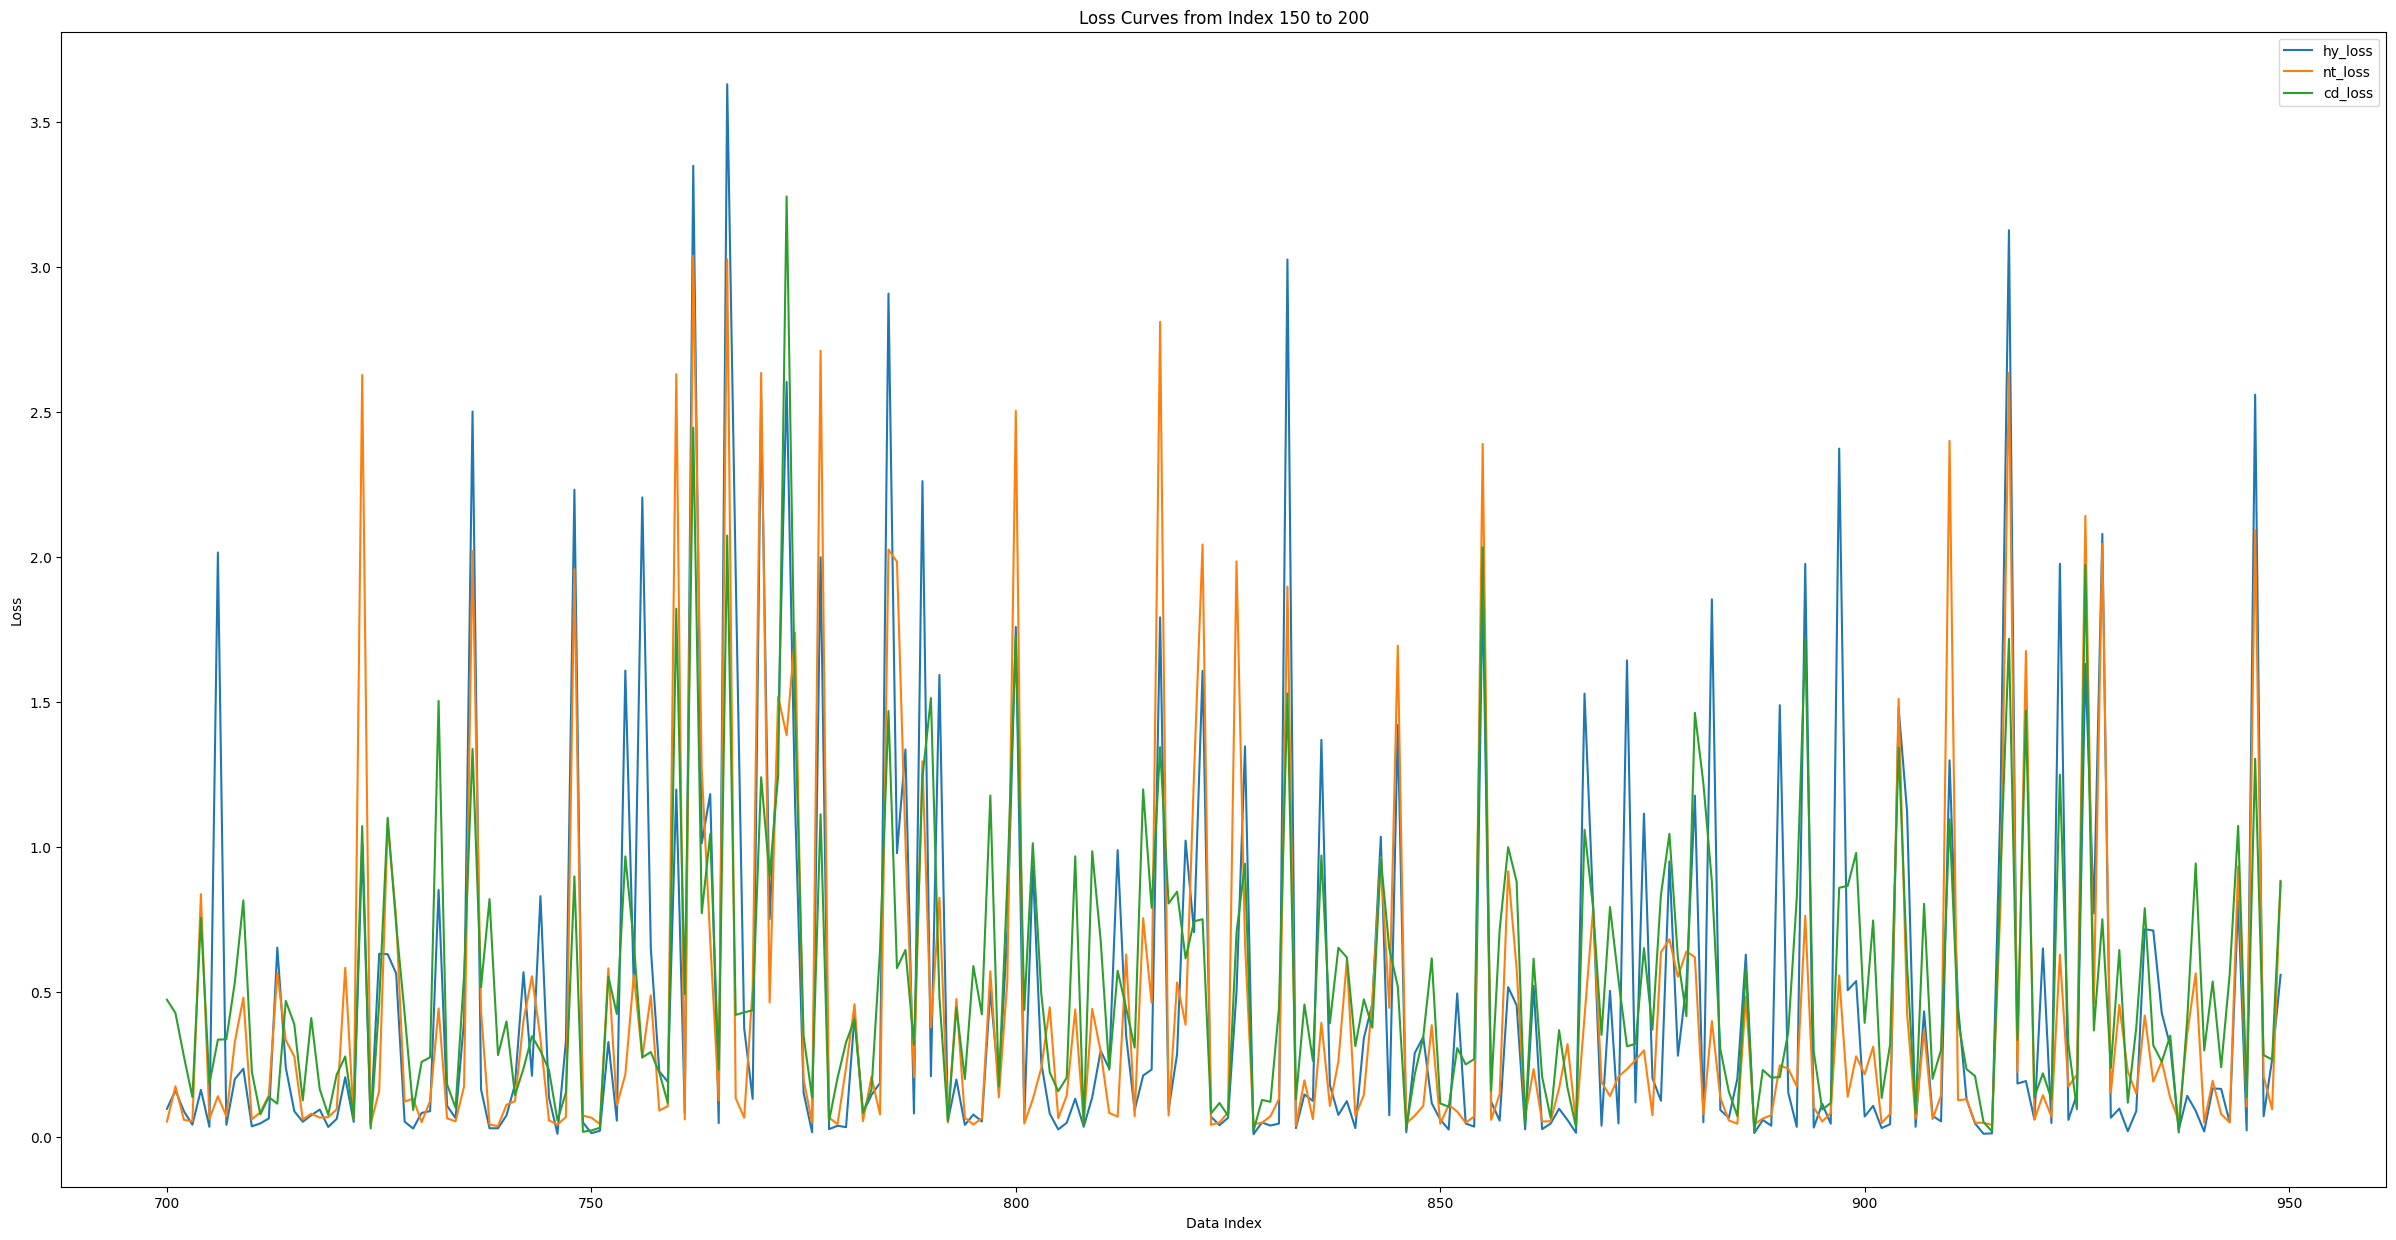

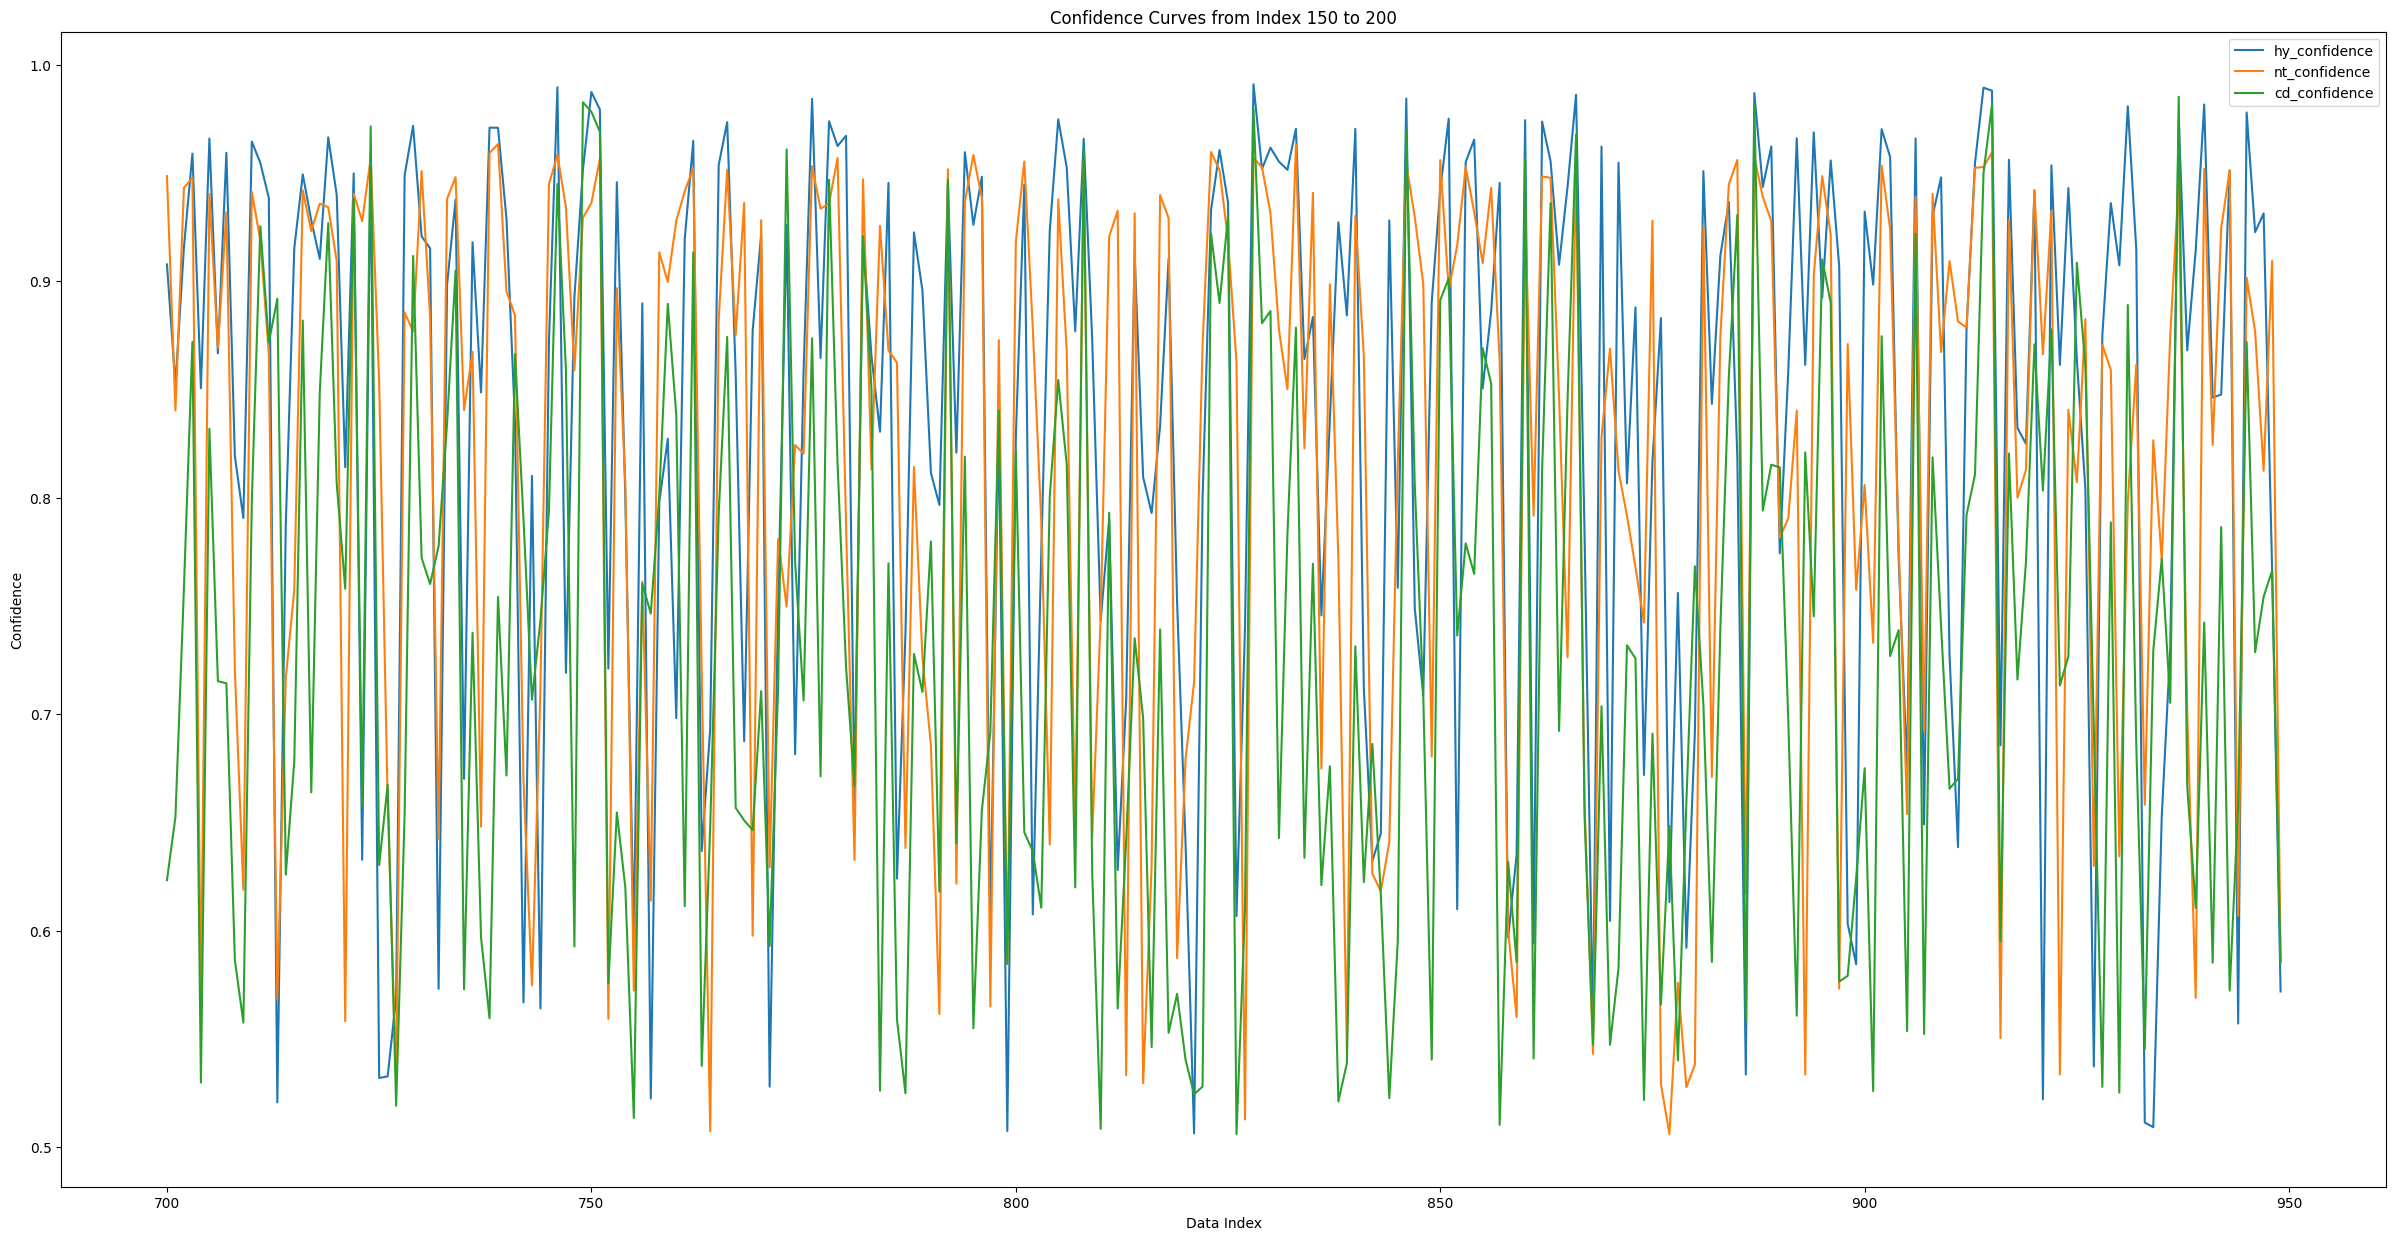

In [ ]:
import torch
import matplotlib.pyplot as plt

data_path = "step2/merged_model_valid_data_results.pt"
data = torch.load(data_path)

start, end = 700, 950
hy_loss = data['hy_loss'][start:end]
nt_loss = data['nt_loss'][start:end]
cd_loss = data['cd_loss'][start:end]
hy_confidence = data['hy_confidence'][start:end]
nt_confidence = data['nt_confidence'][start:end]
cd_confidence = data['cd_confidence'][start:end]

plt.figure(figsize=(30, 15))
plt.plot(range(start, end), hy_loss, label="hy_loss")
plt.plot(range(start, end), nt_loss, label="nt_loss")
plt.plot(range(start, end), cd_loss, label="cd_loss")
plt.xlabel("Data Index")
plt.ylabel("Loss")
plt.title("Loss Curves from Index 150 to 200")
plt.legend()
plt.show()

plt.figure(figsize=(30, 15))
plt.plot(range(start, end), hy_confidence, label="hy_confidence")
plt.plot(range(start, end), nt_confidence, label="nt_confidence")
plt.plot(range(start, end), cd_confidence, label="cd_confidence")
plt.xlabel("Data Index")
plt.ylabel("Confidence")
plt.title("Confidence Curves from Index 150 to 200")
plt.legend()
plt.show()


/var/folders/69/y_h_2twd02q4y_zk07g55xk40000gp/T/ipykernel_50045/340647200.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(data_path)


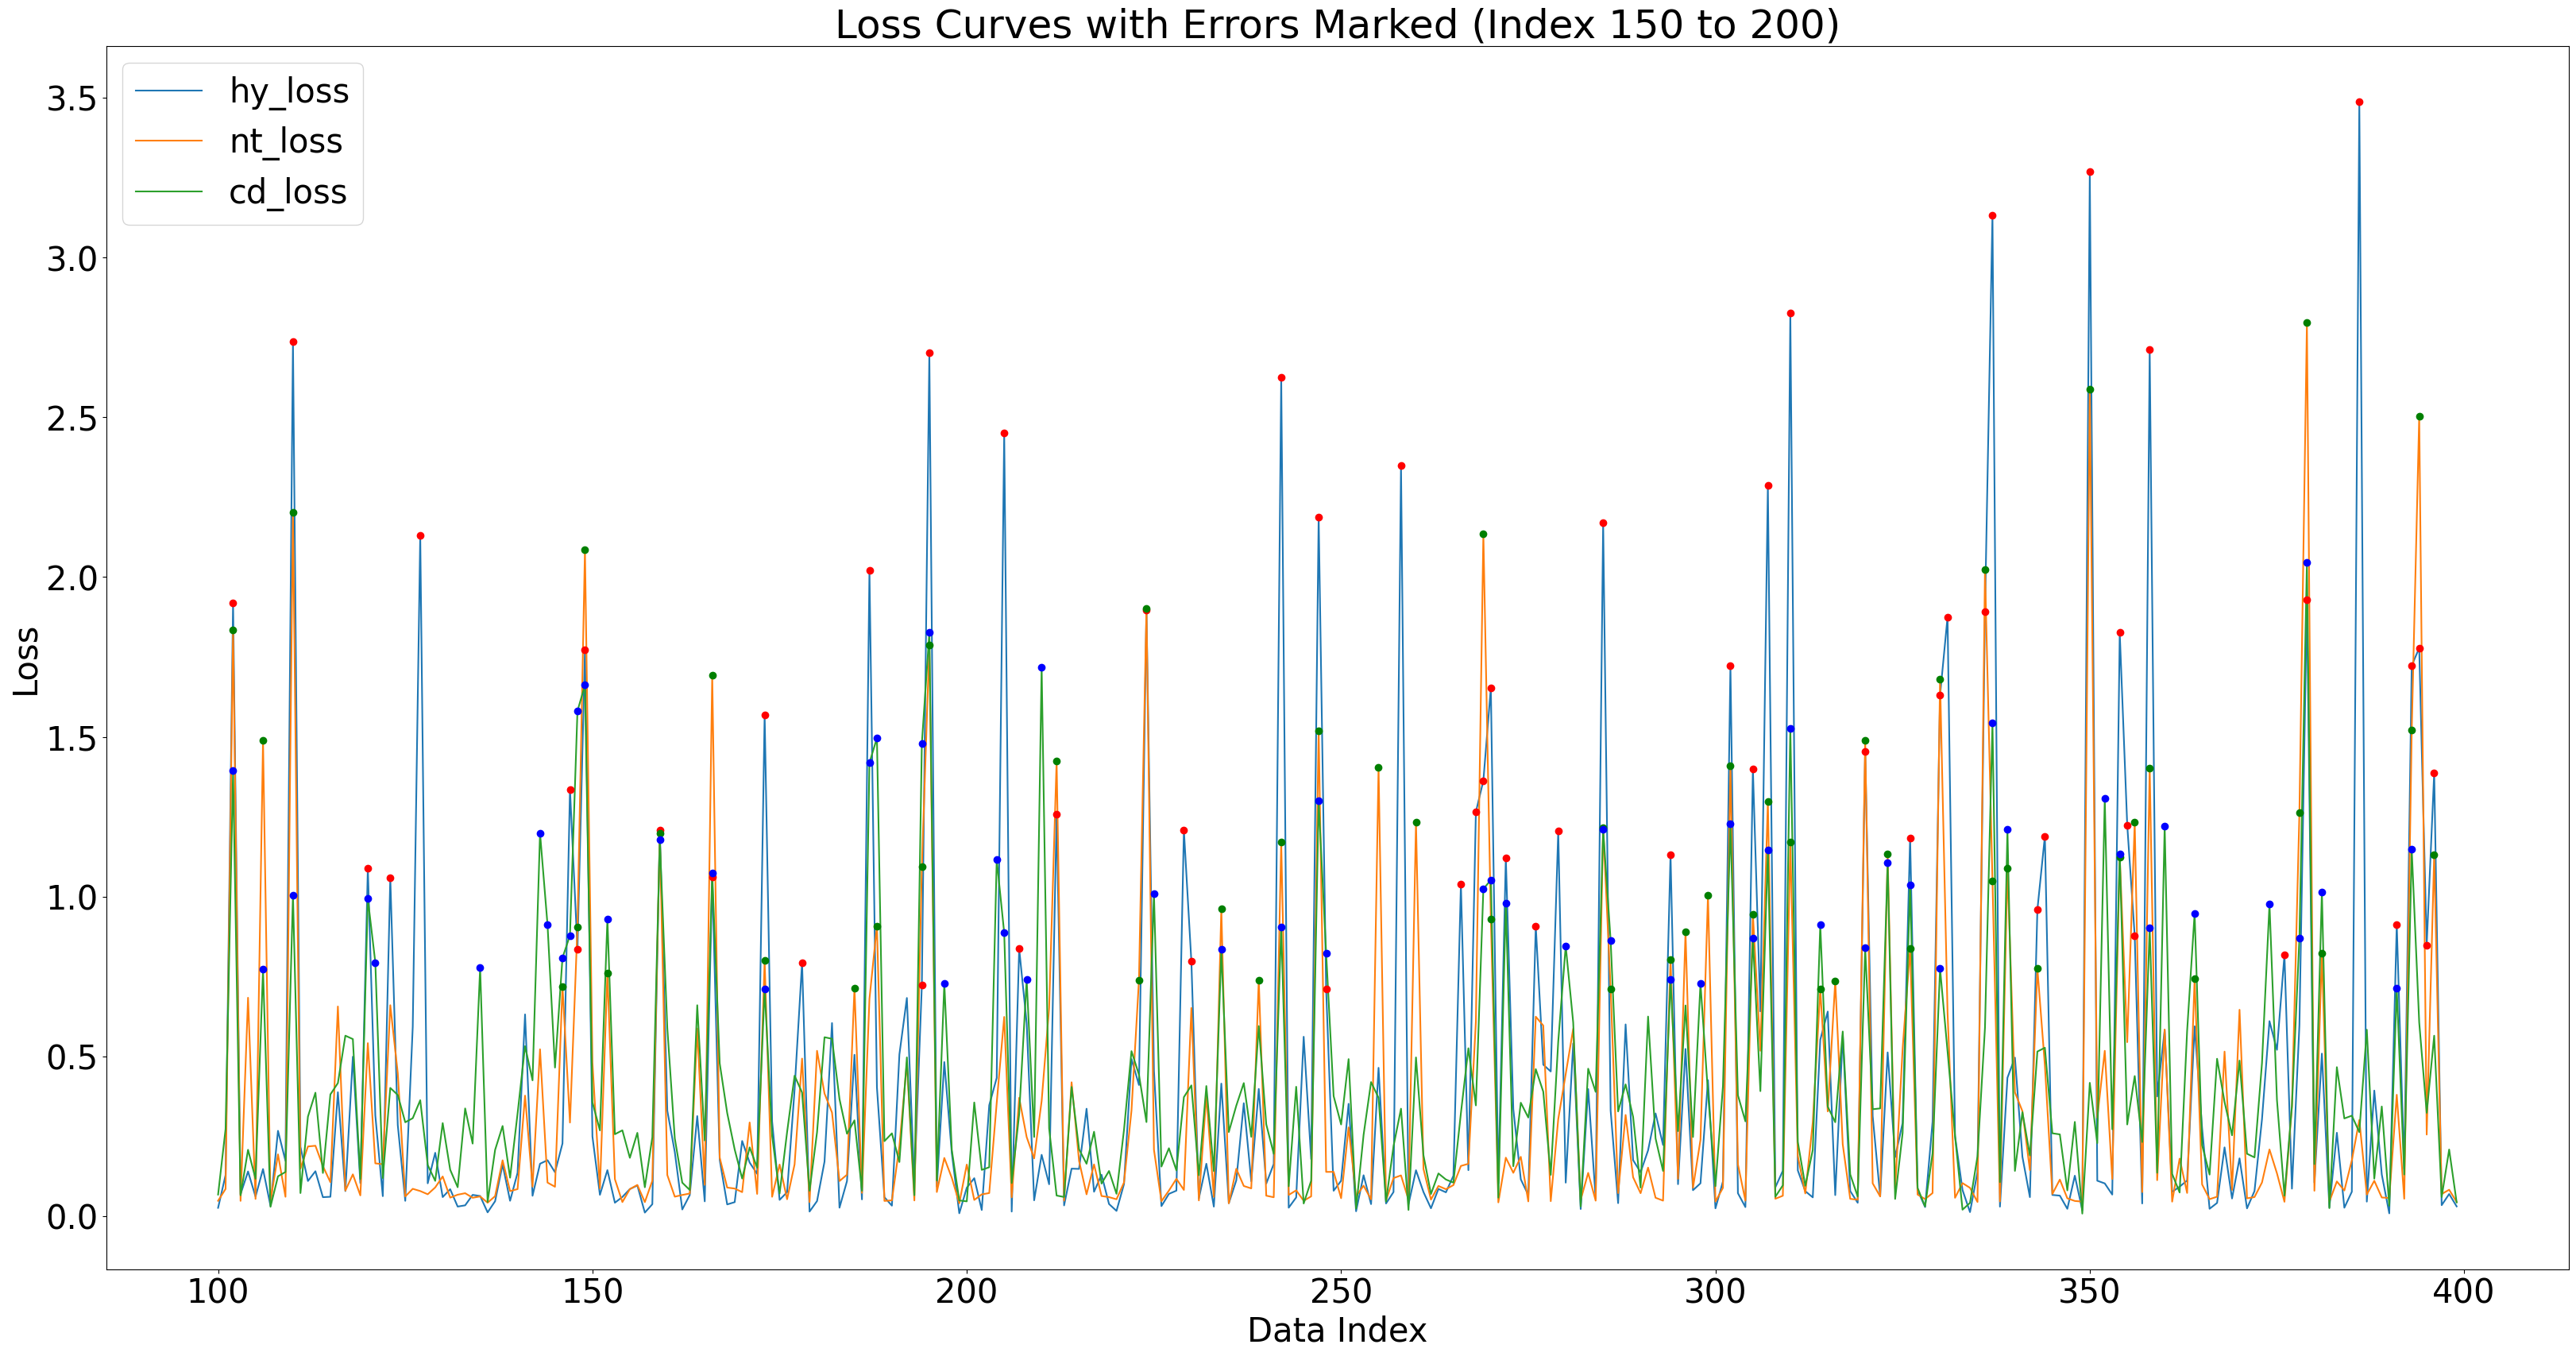

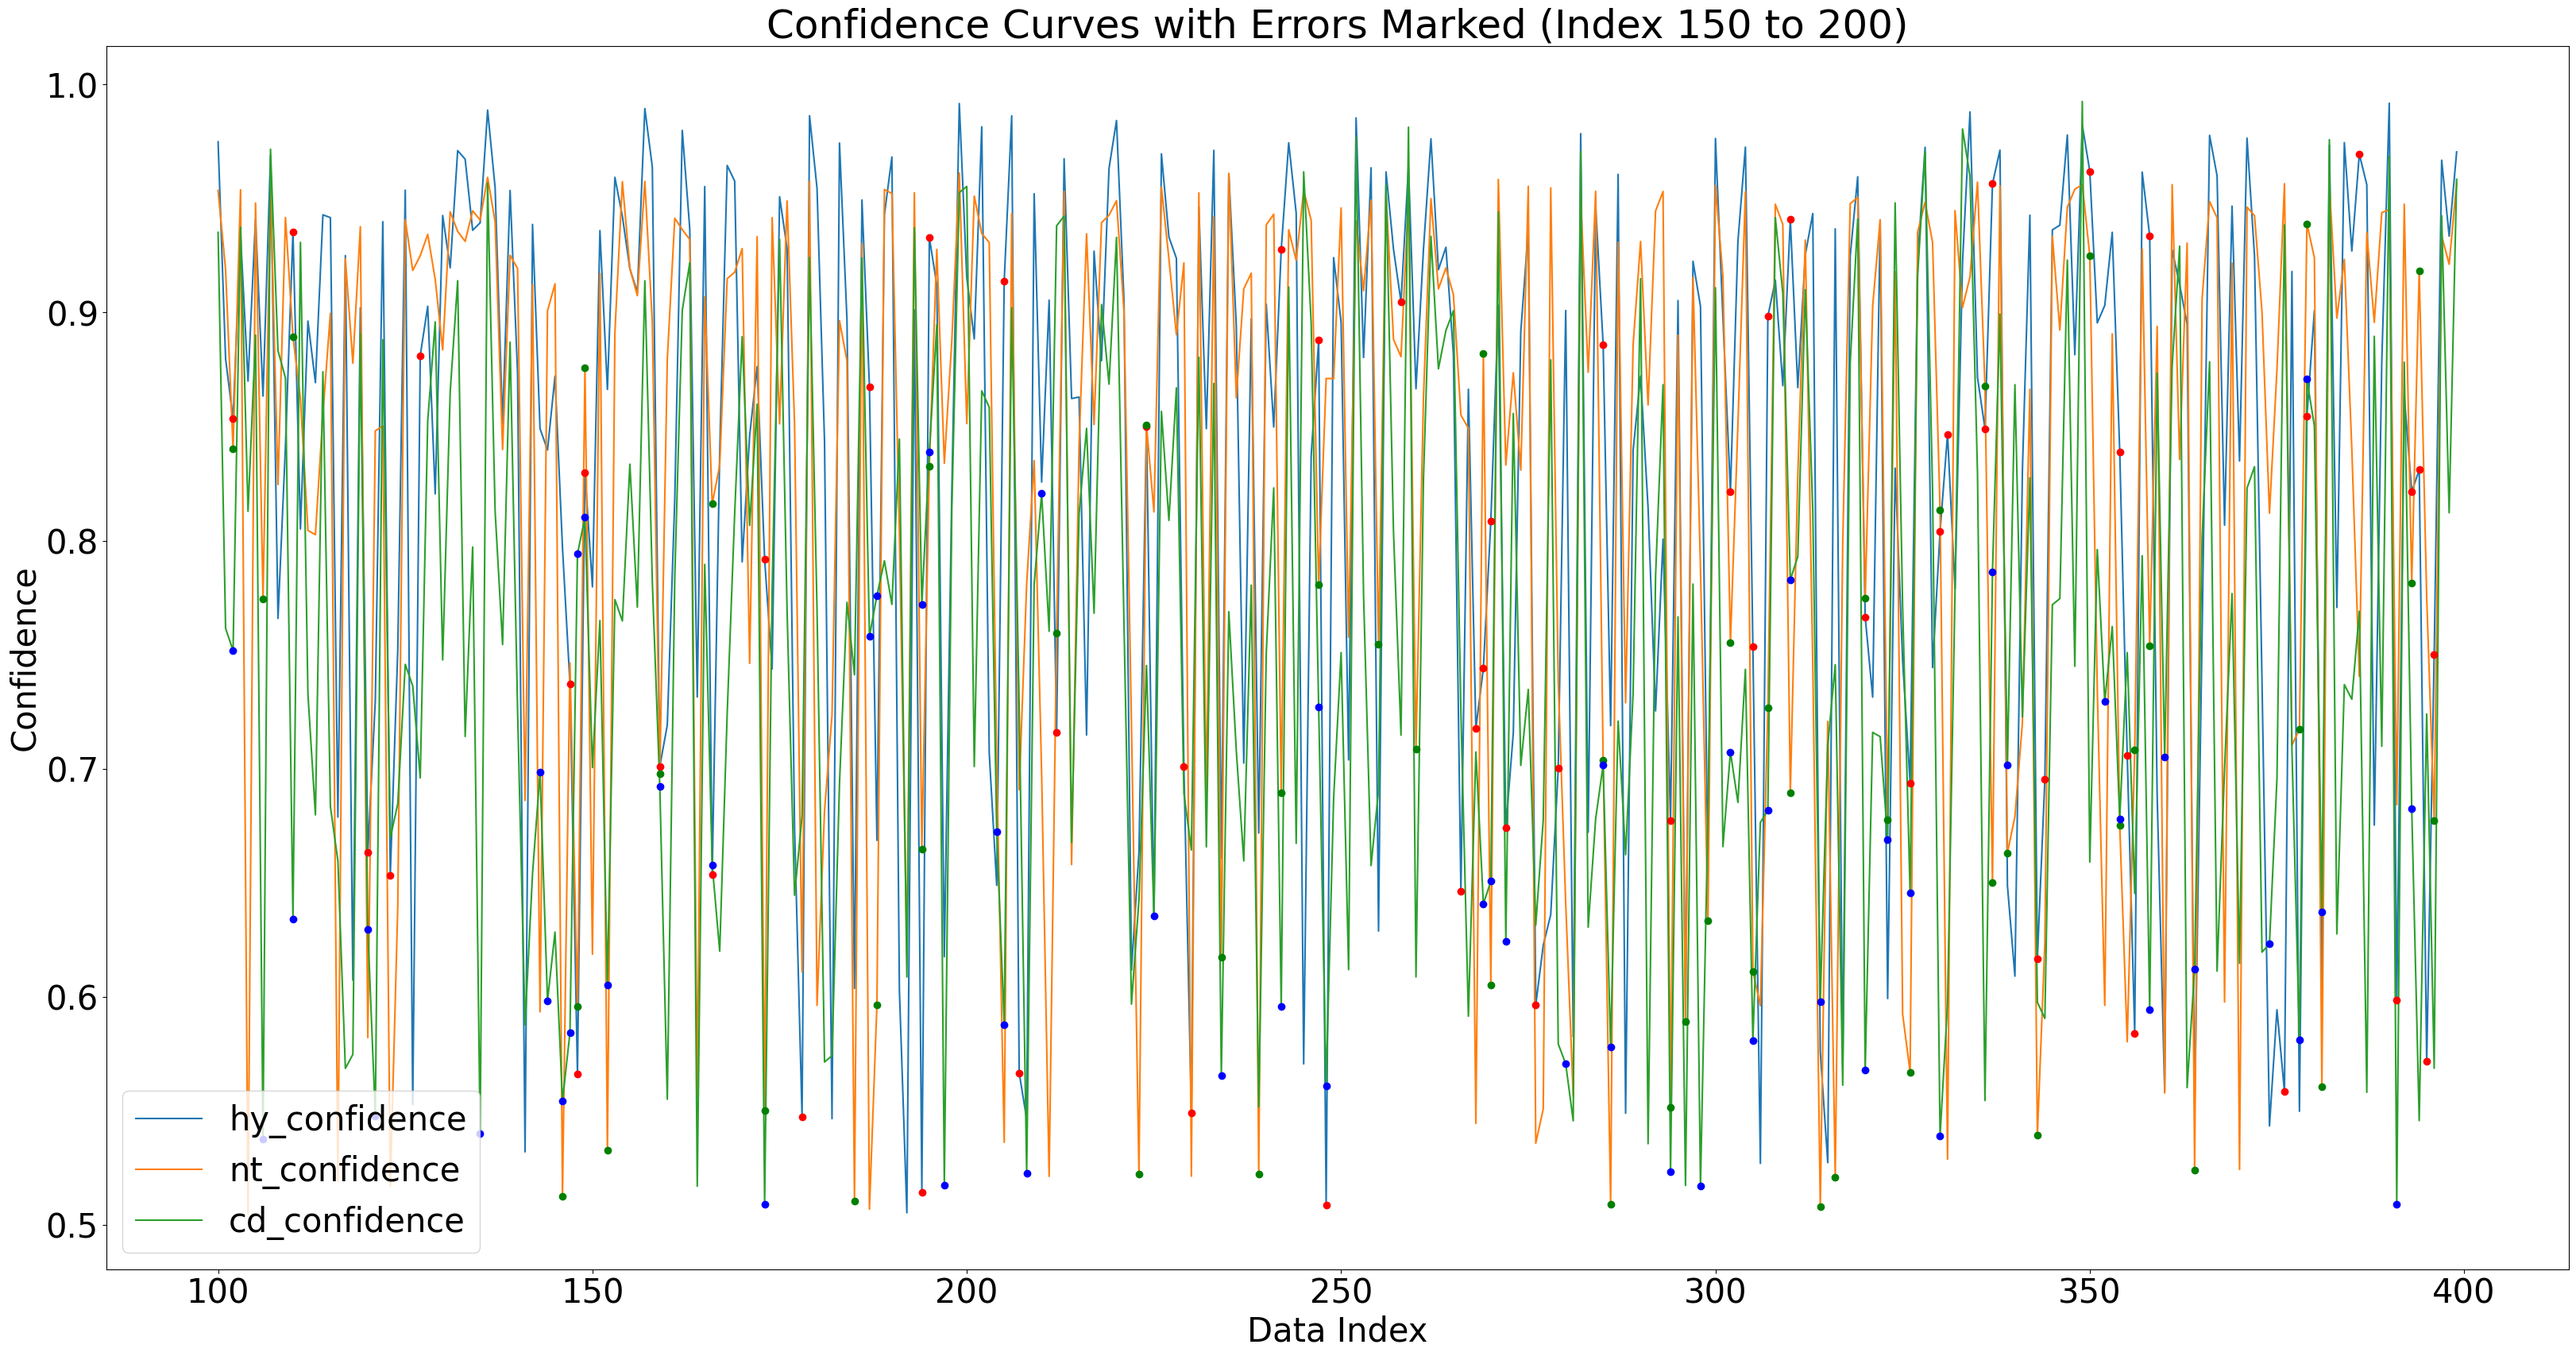

In [ ]:
import torch
import matplotlib.pyplot as plt

data_path = "step2/merged_model_train_data_results.pt"
data = torch.load(data_path)

start, end = 100, 400
hy_loss = data['hy_loss'][start:end]
nt_loss = data['nt_loss'][start:end]
cd_loss = data['cd_loss'][start:end]
hy_confidence = data['hy_confidence'][start:end]
nt_confidence = data['nt_confidence'][start:end]
cd_confidence = data['cd_confidence'][start:end]
true_labels = data['label'][start:end]
hy_predictions = data['hy_prediction'][start:end]
nt_predictions = data['nt_prediction'][start:end]
cd_predictions = data['cd_prediction'][start:end]

hy_correct = [pred == label for pred, label in zip(hy_predictions, true_labels)]
nt_correct = [pred == label for pred, label in zip(nt_predictions, true_labels)]
cd_correct = [pred == label for pred, label in zip(cd_predictions, true_labels)]

plt.rcParams.update({'font.size': 30})

plt.figure(figsize=(40, 20))
plt.plot(range(start, end), hy_loss, label="hy_loss")
plt.plot(range(start, end), nt_loss, label="nt_loss")
plt.plot(range(start, end), cd_loss, label="cd_loss")

for i, correct in enumerate(hy_correct):
    if not correct:
        plt.plot(start + i, hy_loss[i], 'ro')  # The red circle indicates the wrong point

for i, correct in enumerate(nt_correct):
    if not correct:
        plt.plot(start + i, nt_loss[i], 'go')  # The green circle indicates the wrong point

# 标记 cd-gpt 错误预测的点
for i, correct in enumerate(cd_correct):
    if not correct:
        plt.plot(start + i, cd_loss[i], 'bo')  # The blue circle indicates the wrong point

plt.xlabel("Data Index")
plt.ylabel("Loss")
plt.title("Loss Curves with Errors Marked (Index 150 to 200)")
plt.legend()
plt.show()

plt.figure(figsize=(40, 20))
plt.plot(range(start, end), hy_confidence, label="hy_confidence")
plt.plot(range(start, end), nt_confidence, label="nt_confidence")
plt.plot(range(start, end), cd_confidence, label="cd_confidence")

for i, correct in enumerate(hy_correct):
    if not correct:
        plt.plot(start + i, hy_confidence[i], 'ro') 

for i, correct in enumerate(nt_correct):
    if not correct:
        plt.plot(start + i, nt_confidence[i], 'go')  

for i, correct in enumerate(cd_correct):
    if not correct:
        plt.plot(start + i, cd_confidence[i], 'bo')  

plt.xlabel("Data Index")
plt.ylabel("Confidence")
plt.title("Confidence Curves with Errors Marked (Index 150 to 200)")
plt.legend()
plt.show()


/var/folders/69/y_h_2twd02q4y_zk07g55xk40000gp/T/ipykernel_50045/103962602.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(data_path)
/var/folders/69/y

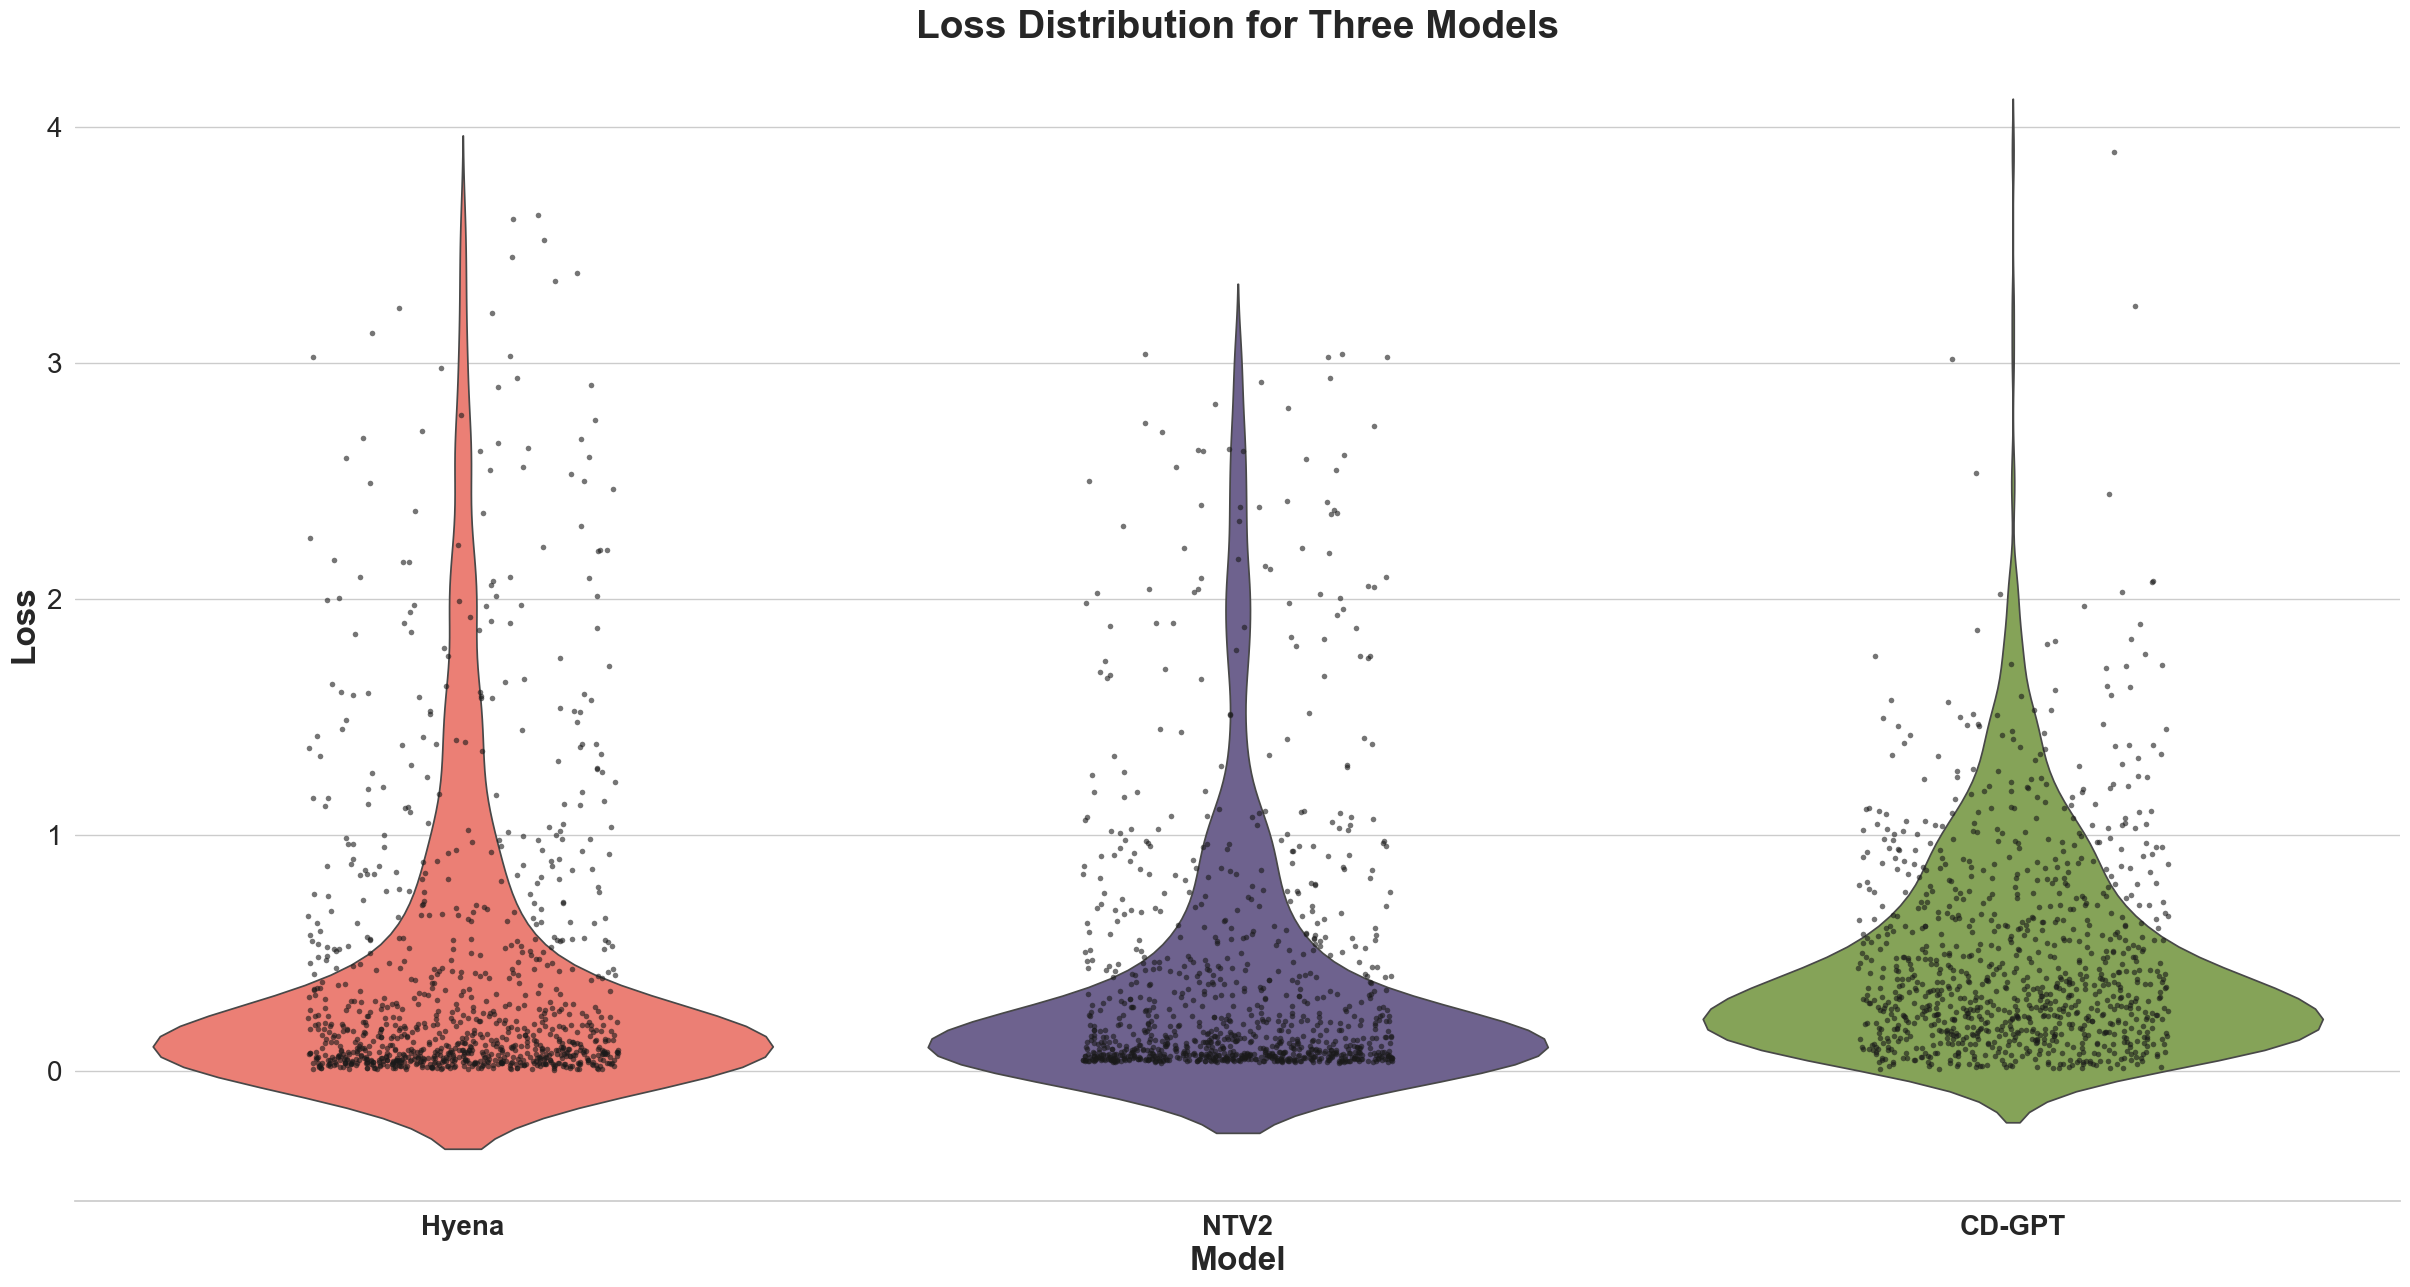

In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data_path = "step2/merged_model_valid_data_results.pt"
data = torch.load(data_path)

hy_loss = data['hy_loss']
nt_loss = data['nt_loss']
cd_loss = data['cd_loss']

loss_data = pd.DataFrame({
    'Hyena': hy_loss,
    'NTV2': nt_loss,
    'CD-GPT': cd_loss
})

loss_data_melted = loss_data.melt(var_name="Model", value_name="Loss")

sns.set(style="whitegrid", palette="pastel", font_scale=1.5)

custom_colors = ["#FF6F61", "#6B5B95", "#88B04B"] 

plt.figure(figsize=(30, 15))
sns.violinplot(x="Model", y="Loss", data=loss_data_melted, palette=custom_colors, inner=None)  

sns.stripplot(x="Model", y="Loss", data=loss_data_melted, color="k", size=4, jitter=0.2, alpha=0.6)

plt.title("Loss Distribution for Three Models", fontsize=28, weight='bold')
plt.xlabel("Model", fontsize=24, weight='bold')
plt.ylabel("Loss", fontsize=24, weight='bold')

plt.xticks(fontsize=20, weight='bold')
plt.yticks(fontsize=20)
sns.despine(left=True) 

plt.show()


/var/folders/69/y_h_2twd02q4y_zk07g55xk40000gp/T/ipykernel_50045/2000636837.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(data_path)
/var/folders/69/

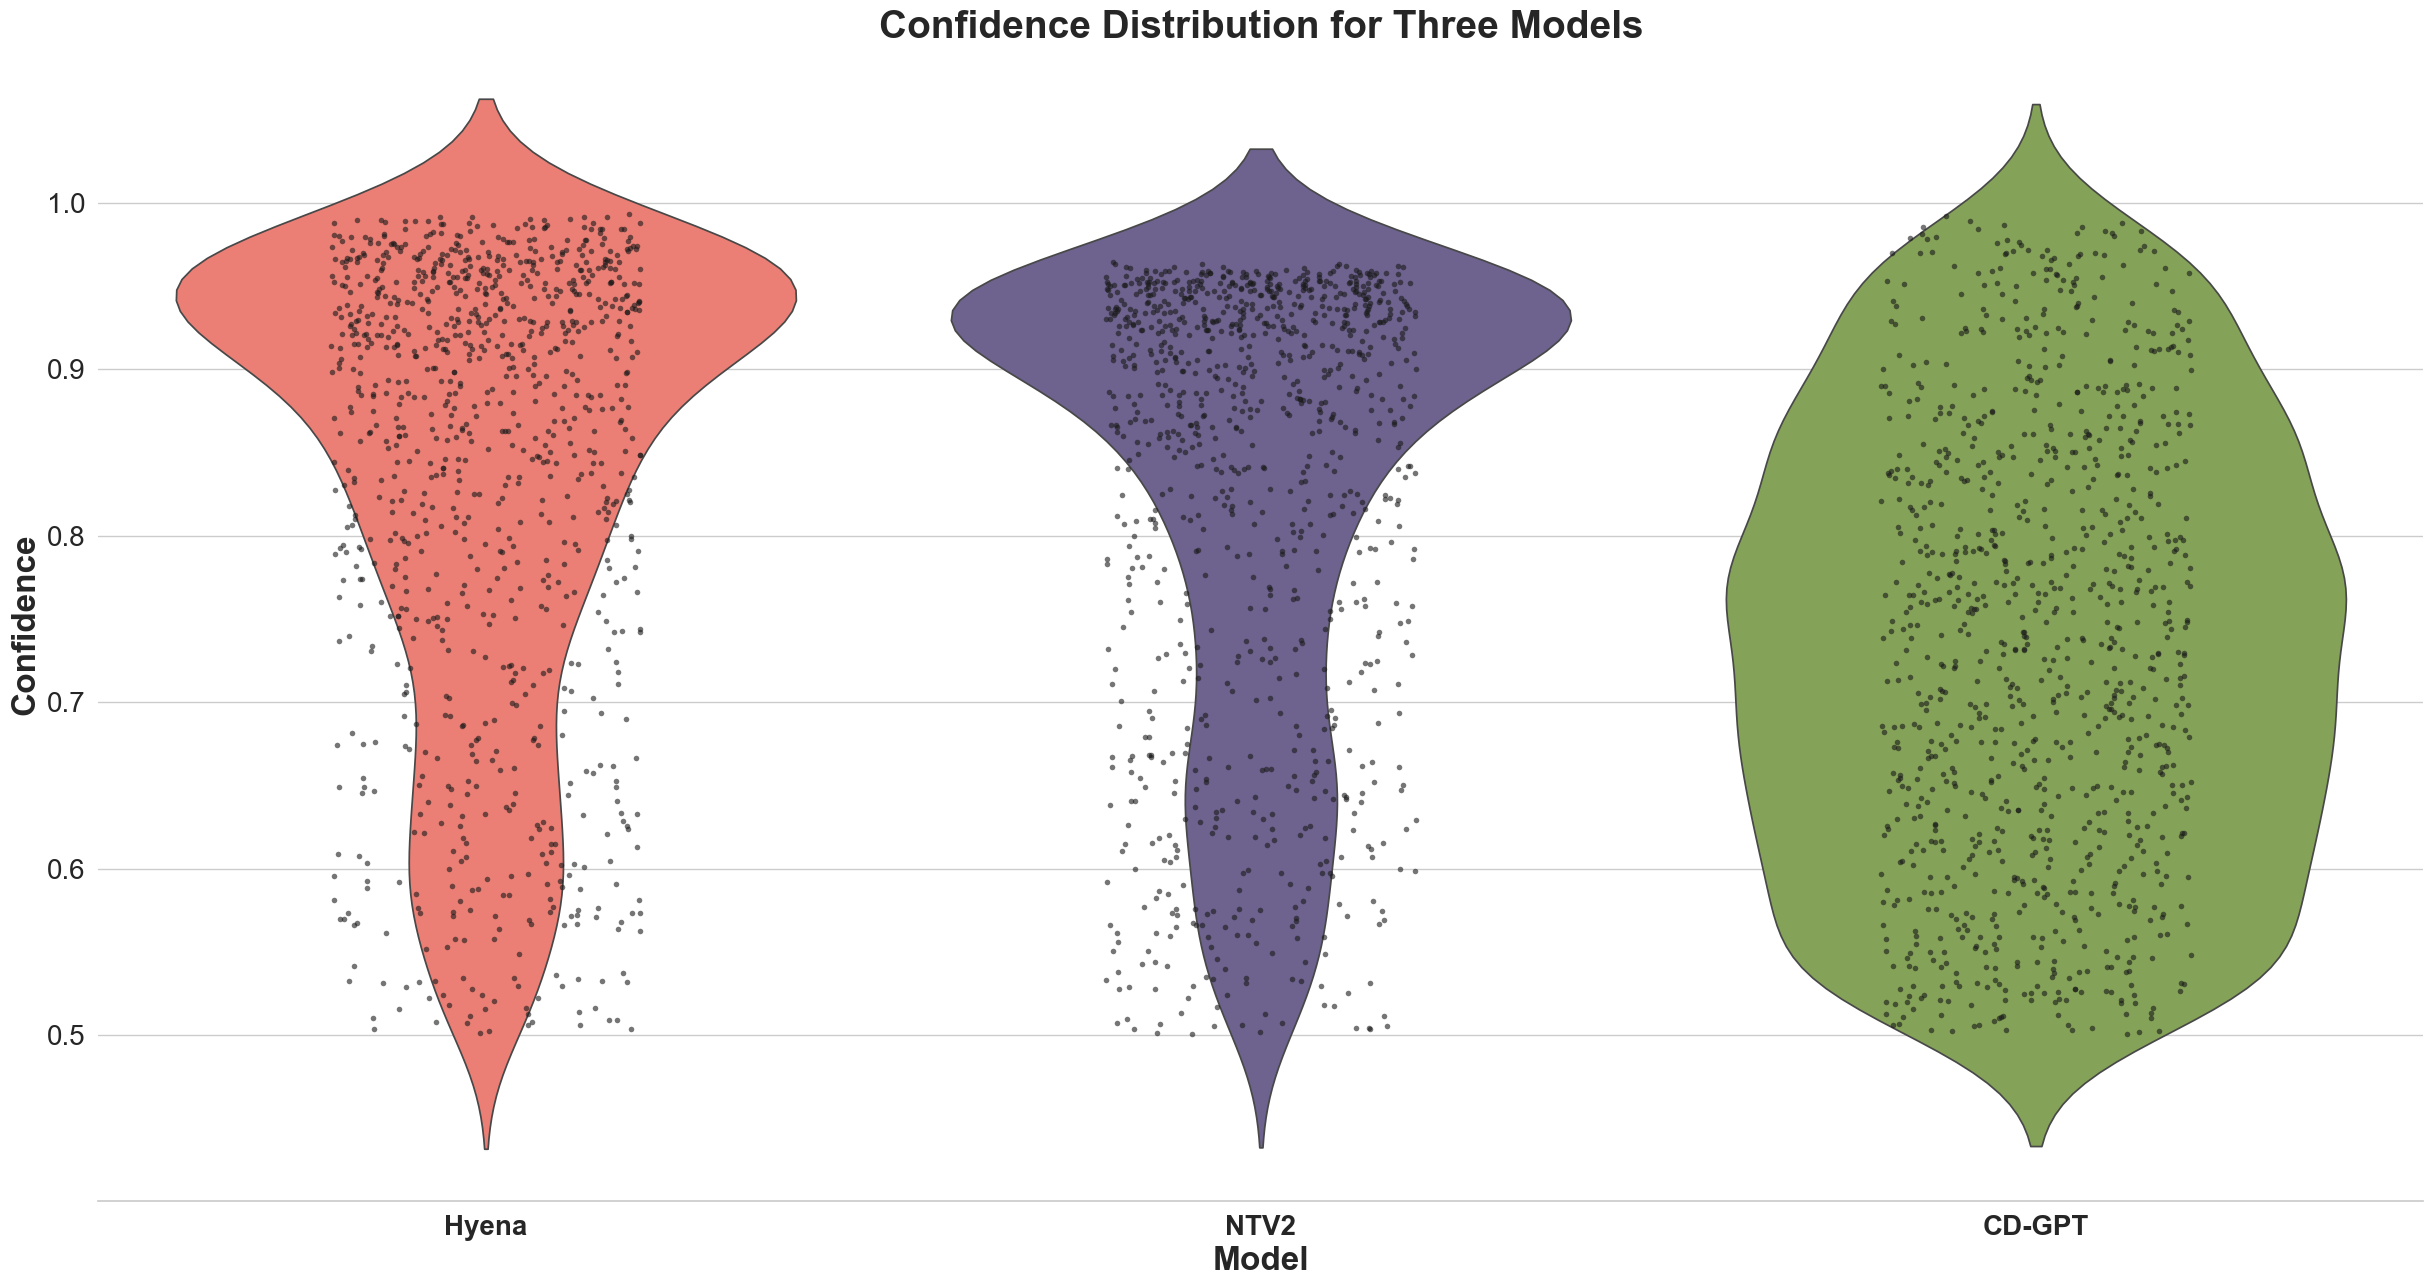

In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data_path = "step2/merged_model_valid_data_results.pt"
data = torch.load(data_path)

hy_loss = data['hy_confidence']
nt_loss = data['nt_confidence']
cd_loss = data['cd_confidence']

loss_data = pd.DataFrame({
    'Hyena': hy_loss,
    'NTV2': nt_loss,
    'CD-GPT': cd_loss
})

loss_data_melted = loss_data.melt(var_name="Model", value_name="Loss")

sns.set(style="whitegrid", palette="pastel", font_scale=1.5)

custom_colors = ["#FF6F61", "#6B5B95", "#88B04B"] 

plt.figure(figsize=(30, 15))
sns.violinplot(x="Model", y="Loss", data=loss_data_melted, palette=custom_colors, inner=None)  

sns.stripplot(x="Model", y="Loss", data=loss_data_melted, color="k", size=4, jitter=0.2, alpha=0.6)

plt.title("Confidence Distribution for Three Models", fontsize=28, weight='bold')
plt.xlabel("Model", fontsize=24, weight='bold')
plt.ylabel("Confidence", fontsize=24, weight='bold')

plt.xticks(fontsize=20, weight='bold')
plt.yticks(fontsize=20)
sns.despine(left=True) 

plt.show()
